In [3]:
import os
import sys

import numpy as np

sys.path.append('..')

import src.preprocessing as preprocessing
import matplotlib.pyplot as plt
import rasterio


### Define data folders and years to consider

In [4]:
# Desired 10 years range from historical data
years_past = np.arange(2000, 2010) # last year excluded

# Desired 10 years range from future data
years_future1 = np.arange(2020, 2030) # last year excluded
years_future2 = np.arange(2040, 2050)

In [5]:
# Working path
path = os.path.join("..", "data")

# Define climate data source folder
path_climate = os.path.join(path, "climate_data", "")

# Define elevation data source folder
path_elevation = os.path.join(path, "geo_data", "")

# Create folder to write all new files to 
path_past = os.path.join("..", "data", "processed_files", "tifs", '2000_2010',"")
path_future1 = os.path.join("..", "data", "processed_files", "tifs", '2020_2030',"")
path_future2= os.path.join("..", "data", "processed_files", "tifs", '2040_2050',"")

### Climate past data. Calculate average per each month within desired years range

In [6]:
if not os.path.exists(path_past):
    os.makedirs(path_past)

preprocessing.process_past_climate(path_climate, path_past, years_past)
preprocessing.process_past_spi(path_climate, path_past, years_past)

100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


Past climate data is collected


100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

Past climate SPI data is collected


### Climate future data. Calculate average per each month within desired years range

In [7]:
# future data 1
preprocessing.process_future_climate(path_climate, path_future1, years_future1, ssps=['ssp126', 'ssp245', 'ssp585'])
preprocessing.process_future_spi(path_climate, path_future1, years_future1, ssps=['ssp126', 'ssp245', 'ssp585'])


  0%|          | 0/30 [00:00<?, ?it/s]/opt/conda/envs/wind_env/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
100%|██████████| 30/30 [00:39<00:00,  1.31s/it]


Future climate data is collected


100%|██████████| 3/3 [00:00<00:00, 10.43it/s]

Future climate SPI data is collected


In [8]:
# future data 2
preprocessing.process_future_climate(path_climate, path_future2, years_future2, ssps=['ssp126', 'ssp245', 'ssp585'])
preprocessing.process_future_spi(path_climate, path_future2, years_future2, ssps=['ssp126', 'ssp245', 'ssp585'])


100%|██████████| 30/30 [00:36<00:00,  1.22s/it]


Future climate data is collected


100%|██████████| 3/3 [00:00<00:00,  7.85it/s]

Future climate SPI data is collected


### Define new bounds in coords (Russia)

In [9]:
# Define coordinate bounds
left = 20
top = 64
right = 152
bottom = 42

# Define the parameters of transformation (width and height in pixels)
width = 9044
height = 1508

# Create object holding all crop features
bound = preprocessing.crop_features(left, top, right, bottom, width, height)


### Elevation data. Crop and reshape

In [10]:
path_elevation_new = os.path.join("..", "data", "processed_files", "tifs", 'elevation', '')

preprocessing.crop_tiff(path_elevation, path_elevation_new, bound)
preprocessing.reshape_tiff(path_elevation_new, path_elevation_new, bound)

100%|██████████| 6/6 [00:55<00:00,  9.22s/it]


6 images croped


100%|██████████| 6/6 [00:20<00:00,  3.46s/it]

6 images reshaped


### Climate data. Crop and reshape

In [11]:
# historic data
preprocessing.crop_tiff(path_past, path_past, bound)
preprocessing.reshape_tiff(path_past, path_past, bound)

100%|██████████| 11/11 [00:00<00:00, 17.10it/s]


11 images croped


100%|██████████| 11/11 [01:04<00:00,  5.85s/it]

11 images reshaped


In [12]:
# future data 1
preprocessing.crop_tiff(path_future1, path_future1, bound)
preprocessing.reshape_tiff(path_future1, path_future1, bound)

100%|██████████| 99/99 [00:03<00:00, 30.48it/s]


99 images croped


100%|██████████| 99/99 [08:09<00:00,  4.94s/it]

99 images reshaped


In [13]:
# future data 2
preprocessing.crop_tiff(path_future2, path_future2, bound)
preprocessing.reshape_tiff(path_future2, path_future2, bound)

100%|██████████| 99/99 [00:03<00:00, 30.41it/s]


99 images croped


100%|██████████| 99/99 [08:05<00:00,  4.90s/it]

99 images reshaped


### Renaming

In [14]:
# Rename historic files
preprocessing.rename_climate(path_past, ssps=['None'])

In [15]:
# Rename future 1 files
preprocessing.rename_climate(path_future1, ssps=['ssp126', 'ssp245', 'ssp585'])

In [16]:
# Rename future 2 files
preprocessing.rename_climate(path_future2, ssps=['ssp126', 'ssp245', 'ssp585'])

BoundingBox(left=18.0, bottom=40.0, right=191.0, top=85.0)
BoundingBox(left=20.0, bottom=42.0, right=152.0, top=64.0)
9044 1508


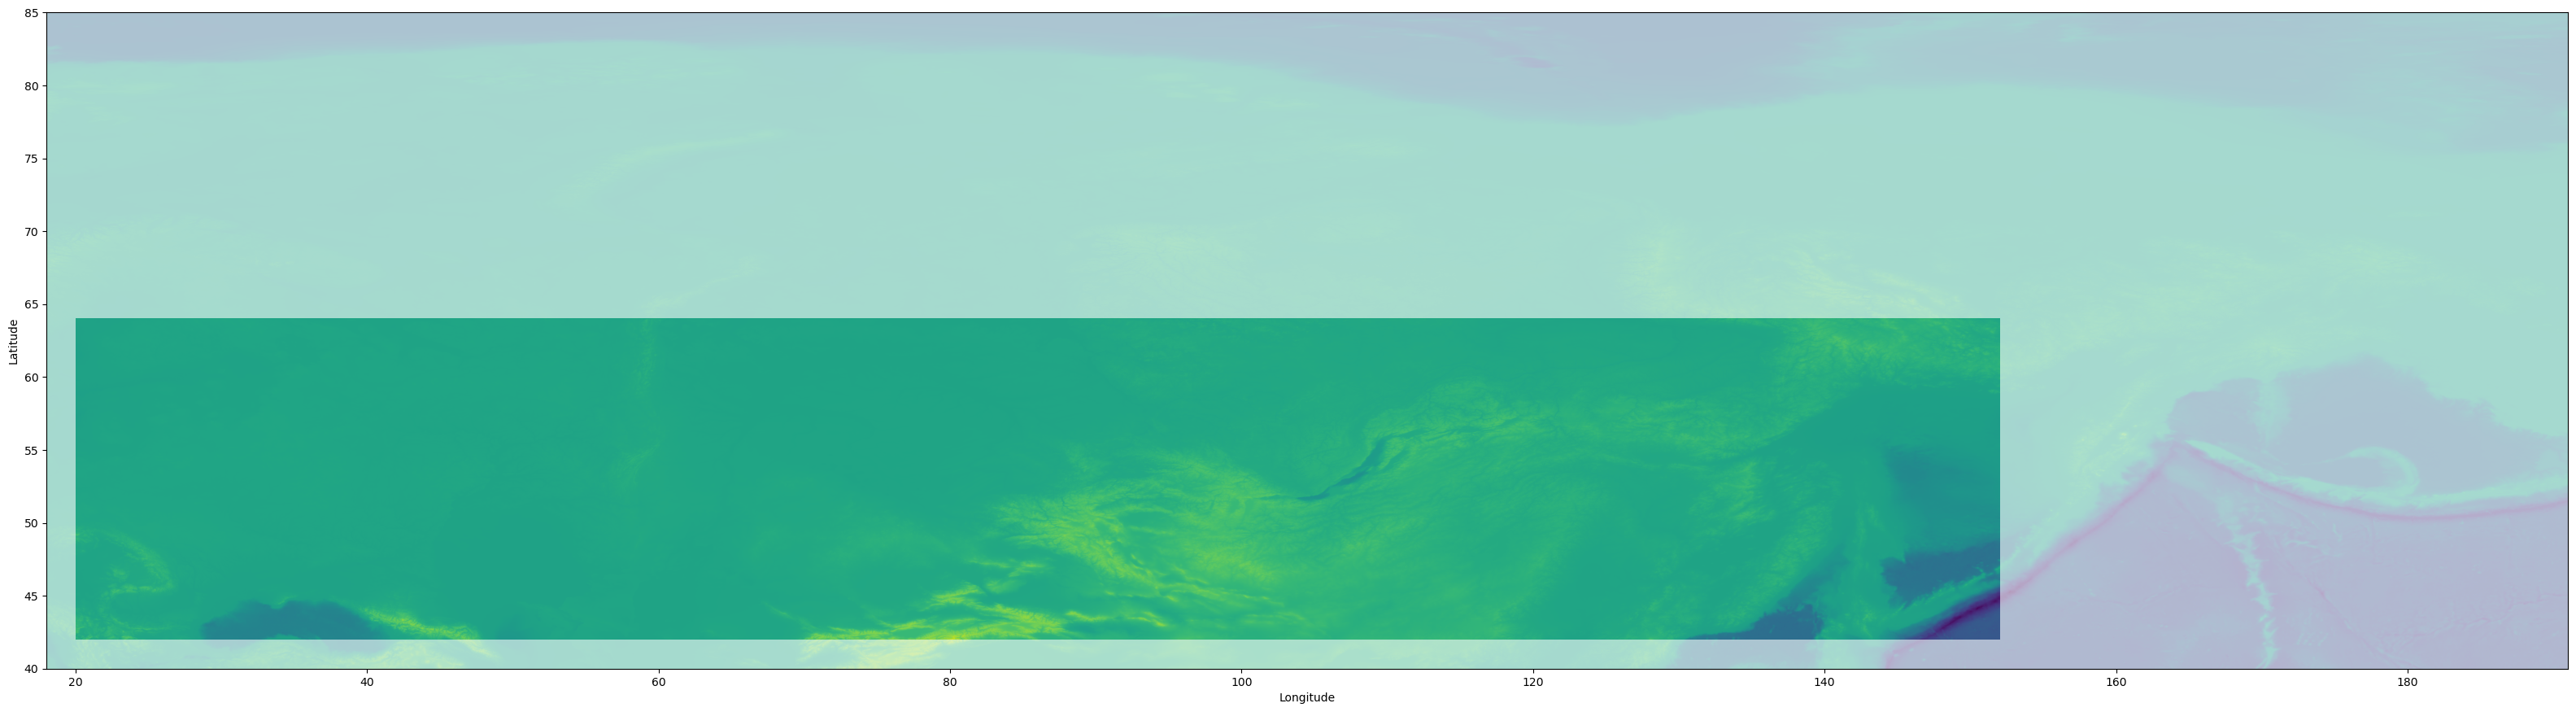

In [17]:
# Just to compare visually
path_to_initial_file = os.path.join(path, "geo_data", "DEM_1km.tif")

raster = rasterio.open(path_to_initial_file)
print(raster.bounds)
elv = rasterio.open(os.path.join(path, "processed_files", 'tifs', 'elevation', "DEM_1km.tif"))
print(elv.bounds)
print(elv.width, elv.height)

fig, ax = plt.subplots(figsize=(40, 15))

rasterio.plot.show(elv, ax=ax)
rasterio.plot.show(raster, ax=ax, alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

raster.close()
elv.close()